# INTRODUCTION

In this project, the Breast Tissue Measurements dataset will be explored and analyzed through various stages of data analysis and clustering techniques. The project is structured into multiple notebooks, each focusing on different aspects and methodologies. Below is an overview of the planned notebooks and their contents:

## Notebook 1: Exploratory Data Analysis (EDA)

In this notebook, detailed Exploratory Data Analysis (EDA) will be performed to understand the dataset. The distributions and relationships between variables will be visualized using correlation matrices and box plots. Key patterns and potential anomalies in the data will be identified.

## Notebook 2: Principal Component Analysis (PCA) and Distance Metric Determination

This notebook will cover the application of Principal Component Analysis (PCA) to reduce the dimensionality of the dataset. The most informative components will be identified, and the appropriate distance metric for clustering based on the transformed data will be determined.

## Notebook 3: K-Means Clustering

In this notebook, the K-Means clustering algorithm will be applied to the dataset. Different values of K will be explored to find the optimal number of clusters. The resulting clusters and their characteristics will be analyzed.

## Notebook 4: K-Medoids Clustering

This notebook will focus on implementing the K-Medoids clustering algorithm. The performance and results will be compared with K-Means. The robustness of the clusters will be evaluated.

## Notebook 5: Hierarchical Clustering

Hierarchical clustering will be performed on the dataset in this notebook. The dendrogram will be visualized to understand the clustering hierarchy. Meaningful clusters based on the hierarchical structure will be identified.

## Notebook 6: Hierarchical K-Means Clustering

In this notebook, hierarchical clustering will be combined with K-Means. The hierarchical approach will be used to determine initial cluster centers, which will then be refined using K-Means for improved results.

## Notebook 7: Model-Based Clustering

Model-based clustering techniques, such as Gaussian Mixture Models (GMM), will be applied in this notebook. The data will be analyzed under different model assumptions, and the fit of various models will be evaluated to determine the best clustering approach.

## Notebook 8: Density-Based Clustering

This notebook will explore the use of density-based clustering methods like DBSCAN. Clusters will be identified based on data density, and noise and outliers will be handled effectively.

## Notebook 9: Selecting the Optimal Clustering Method

Finally, the results of different clustering techniques will be compared in this notebook. Cluster validation metrics will be used to evaluate and select the best clustering method. The implications and insights gained from the optimal clustering solution will be discussed.

Each notebook will provide a detailed analysis and visualization of the respective methods, ensuring a comprehensive understanding of the dataset and the clustering techniques applied.


In [1]:
library(ggplot2)
library(tidyverse)
library(corrplot)

data <- read.csv("/kaggle/input/breast-tissue-impedance-measurements/data.csv")
head(data)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
corrplot 0.92 loaded



,Class,I0,PA500,HFS,DA,Area,A.DA,Max.IP,DR,P
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,car,524.7941,0.1874484,0.03211406,228.8002,6843.598,29.91080,60.20488,220.73721,556.8283
2,car,330.0000,0.2268928,0.26529005,121.1542,3163.239,26.10920,69.71736,99.08496,400.2258
3,car,551.8793,0.2324779,0.06352998,264.8049,11888.392,44.89490,77.79330,253.78530,656.7694
4,car,380.0000,0.2408554,0.28623400,137.6401,5402.171,39.24852,88.75845,105.19857,493.7018
5,car,362.8313,0.2007129,0.24434610,124.9126,3290.462,26.34213,69.38939,103.86655,424.7965
6,car,389.8730,0.1500983,0.09773844,118.6258,2475.557,20.86862,49.75715,107.68616,429.3858


# BOXPLOT

In [2]:
summary(data)

    Class                 I0             PA500              HFS          
 Length:106         Min.   : 103.0   Min.   :0.01239   Min.   :-0.06632  
 Class :character   1st Qu.: 250.0   1st Qu.:0.06741   1st Qu.: 0.04398  
 Mode  :character   Median : 384.9   Median :0.10542   Median : 0.08657  
                    Mean   : 784.3   Mean   :0.12013   Mean   : 0.11469  
                    3rd Qu.:1488.0   3rd Qu.:0.16960   3rd Qu.: 0.16650  
                    Max.   :2800.0   Max.   :0.35832   Max.   : 0.46775  
       DA               Area                A.DA             Max.IP       
 Min.   :  19.65   Min.   :    70.43   Min.   :  1.596   Min.   :  7.969  
 1st Qu.:  53.85   1st Qu.:   409.65   1st Qu.:  8.180   1st Qu.: 26.894  
 Median : 120.78   Median :  2219.58   Median : 16.134   Median : 44.216  
 Mean   : 190.57   Mean   :  7335.16   Mean   : 23.474   Mean   : 75.381  
 3rd Qu.: 255.33   3rd Qu.:  7615.20   3rd Qu.: 30.953   3rd Qu.: 83.672  
 Max.   :1063.44   Max.   :17448

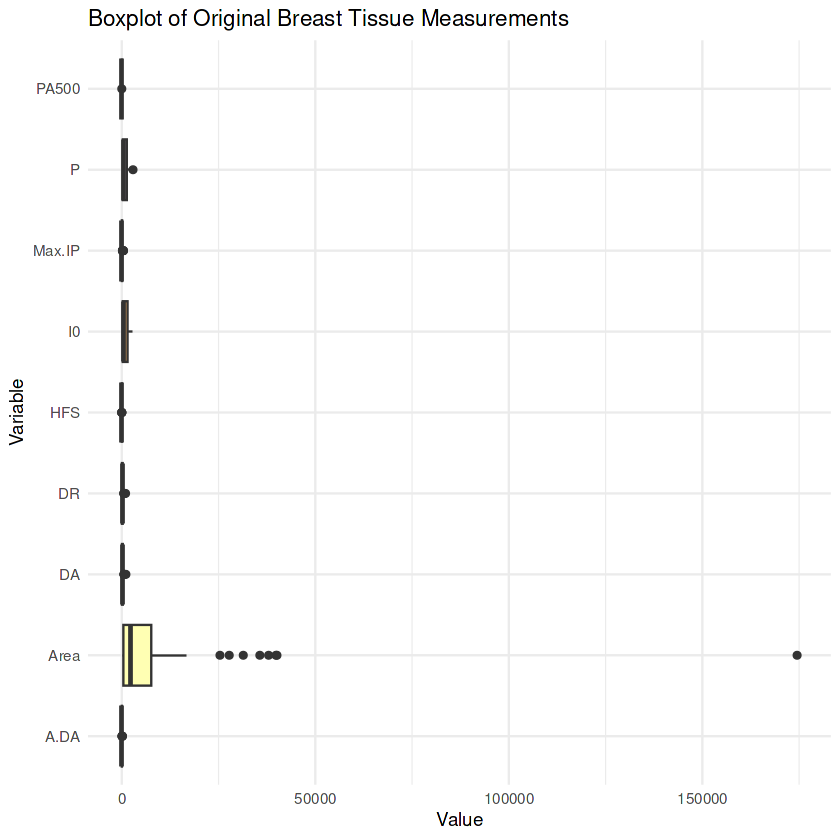

In [3]:
data_long <- data %>% 
  select(-Class,) %>% 
  pivot_longer(cols = everything(), names_to = "Variable", values_to = "Value")

ggplot(data_long, aes(x = Value, y = Variable, fill = Variable)) +
  geom_boxplot() +
  scale_fill_brewer(palette = "Set3") +
  theme_minimal() +
  labs(title = "Boxplot of Original Breast Tissue Measurements",
       x = "Value",
       y = "Variable") +
  theme(legend.position = "none")

This graph shows the distribution of raw (untransformed) breast tissue measurements. However, due to significant imbalances between the values and extremely high values in some variables, it is difficult to observe the distributions of other variables. For example, the Area variable has a maximum value of 174480.48, causing the boxplots of other variables to be compressed. This large imbalance in the values necessitates transformation to make the data more meaningful for visualization. Using transformation methods such as min-max scaling or standardization can balance the data, allowing for clearer analysis of the distributions of all variables.

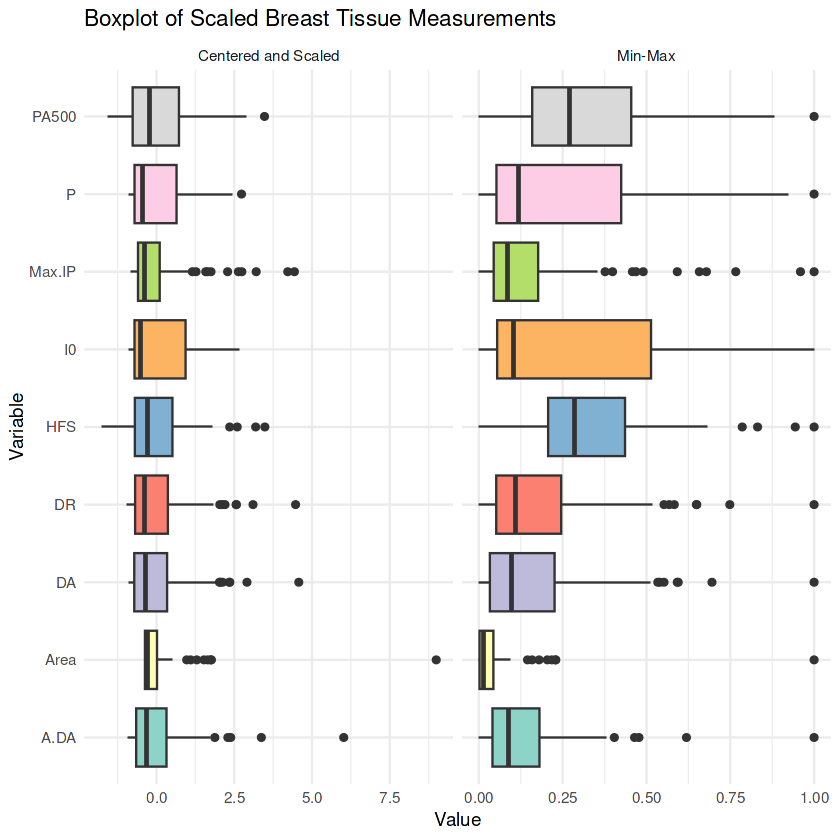

In [4]:
min_max_scale <- function(x) {
  (x - min(x)) / (max(x) - min(x))
}

data_min_max <- data %>% 
  mutate(across(-Class, min_max_scale))

data_min_max_long <- data_min_max %>% 
  select(-Class) %>% 
  pivot_longer(cols = everything(), names_to = "Variable", values_to = "Value") %>% 
  mutate(Scale_Type = "Min-Max")

data_centered_scaled <- data %>% 
  mutate(across(-Class, ~ scale(.) %>% as.vector()))

data_centered_scaled_long <- data_centered_scaled %>% 
  select(-Class) %>% 
  pivot_longer(cols = everything(), names_to = "Variable", values_to = "Value") %>% 
  mutate(Scale_Type = "Centered and Scaled")

combined_data <- bind_rows(data_min_max_long, data_centered_scaled_long)

ggplot(combined_data, aes(x = Value, y = Variable, fill = Variable)) +
  geom_boxplot() +
  scale_fill_brewer(palette = "Set3") +  # Canlı renk paleti
  theme_minimal() +
  labs(title = "Boxplot of Scaled Breast Tissue Measurements",
       x = "Value",
       y = "Variable") +
  theme(legend.position = "none") +
  facet_wrap(~ Scale_Type, scales = "free_x")

This graph shows the distributions of breast tissue measurements after applying two different scaling methods: centered and scaled (standardization) and min-max scaling.

**Centered and Scaled (Standardization):**
- This method centers the data by subtracting the mean and scales it by dividing by the standard deviation.
- It ensures that the data has a mean of 0 and a standard deviation of 1.
- The resulting boxplots indicate the relative variability of each variable around the mean.
- This method is useful for algorithms that assume normally distributed data or that are sensitive to the scale of the input data, such as PCA and linear regression.

**Min-Max Scaling:**
- This method scales the data to a fixed range, typically [0, 1].
- It preserves the relationships between the data points, while ensuring that all features contribute equally to the analysis.
- The resulting boxplots clearly show the range of each variable, making it easy to compare different features directly.
- Although the boxplots show a wider distribution, this method is not optimal for PCA and clustering analysis.

PCA and clustering analysis typically benefit more from the centered and scaled (standardization) method. This method ensures that all features are on the same scale, leading to more accurate and meaningful analyses. In subsequent steps, the centered and scaled data will be used for clustering analysis, as this method is considered more successful for PCA and clustering.

In conclusion, even though the min-max scaling boxplots show a wider distribution, the centered and scaled data will be used for PCA and clustering analysis. This approach will provide more accurate and meaningful results.


# CORRELATION PLOT

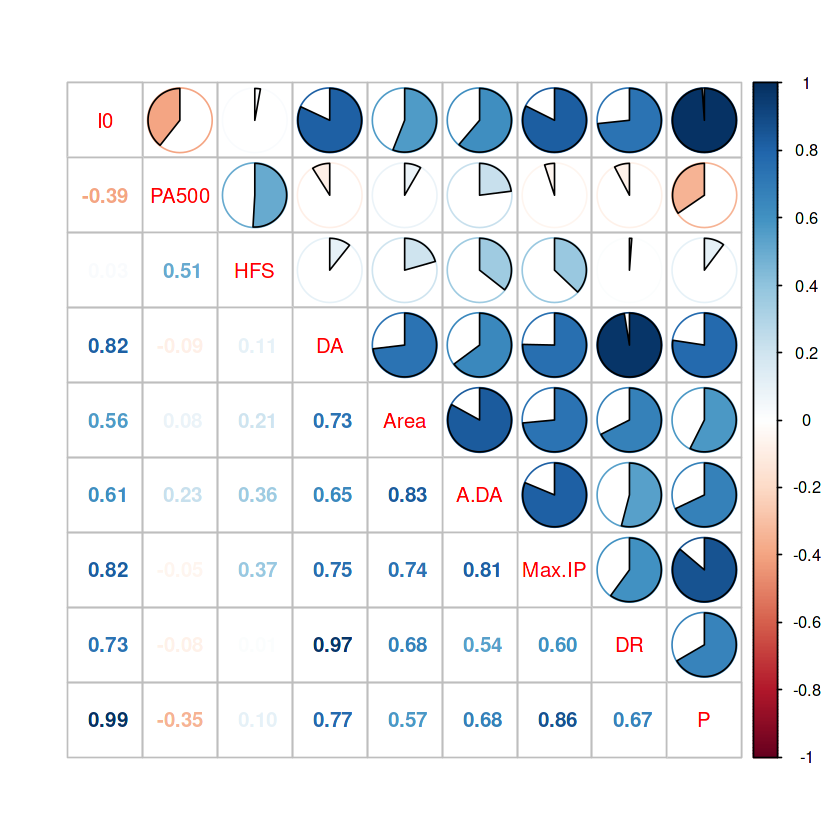

In [5]:
corr=cor(data_centered_scaled[,2:10], method = "pearson")
corrplot.mixed(corr,upper="pie")

This correlation matrix clearly shows the relationships between breast tissue measurements. There is a very high positive correlation (0.99) between I0 and DR, indicating that these two variables behave very similarly. Similarly, there is a high positive correlation between Area and A.DA (0.97). On the other hand, there is a noticeable negative correlation (-0.39) between I0 and PA500. These data reveal that some variable pairs exhibit strong relationships, while others show weak or inverse relationships. Such correlation information is critical for determining which variables are more meaningful in PCA and clustering analy